In [1]:
# Star Wars Script Analysis
# Analytics and visualizations of the Star Wars original trilogy scripts
# A way of practicing data analytics using Python and, specifically, the pandas, numpy, seaborn,
# and matplotlib libraries

import numpy as np
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", color_codes=True)

In [2]:
# Read each script into a pandas DataFrame format (only includes first two columns of csv file)

epIV = pd.read_csv('/kaggle/input/star-wars-movie-scripts-in-csv-format/SW_EpisodeIV.csv', usecols=[0, 1])
epV = pd.read_csv('/kaggle/input/star-wars-movie-scripts-in-csv-format/SW_EpisodeV.csv', usecols=[0, 1])
epVI = pd.read_csv('/kaggle/input/star-wars-movie-scripts-in-csv-format/SW_EpisodeVI.csv', usecols=[0, 1])
allEps = pd.concat([epIV, epV, epVI], axis=0) # Make a combined DataFrame of all three movie scripts

# **Visualizing Characters' Number of Lines of Dialogue**

In [3]:
# Get the number of lines of dialogue for each Character in each dataframe

epIVValues = epIV['Character'].value_counts()
epVValues = epV['Character'].value_counts()
epVIValues = epVI['Character'].value_counts()
allEpsValues = allEps['Character'].value_counts()

allEpsValues.head()

LUKE        494
HAN         459
THREEPIO    301
LEIA        227
VADER       140
Name: Character, dtype: int64

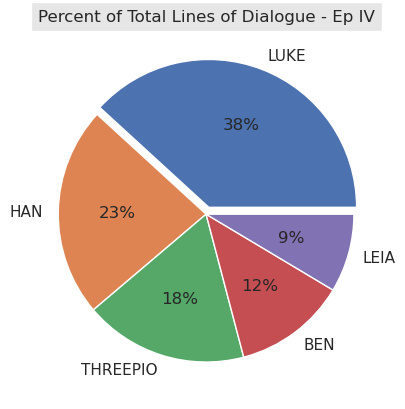

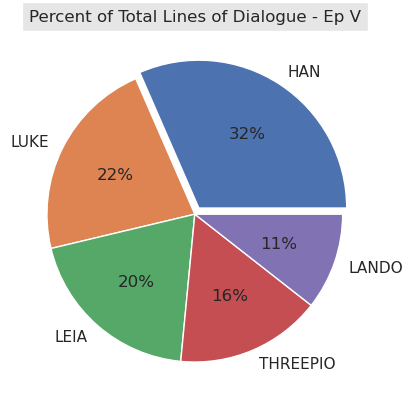

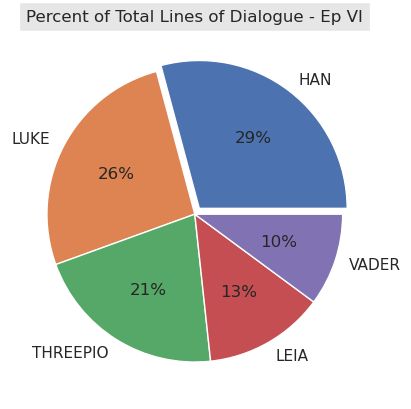

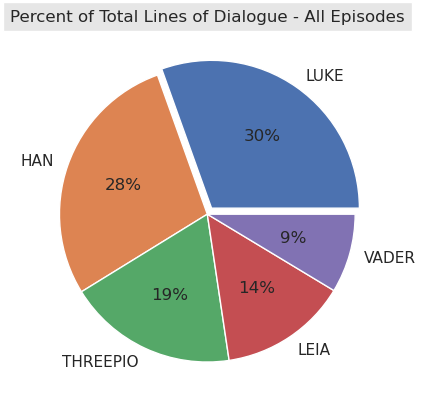

In [4]:
colors = sns.color_palette('deep') # Set color pallete to be used in charts
explode = [0.05, 0, 0, 0, 0] # Set pie charts to 'explode' out the highest value

# Create a pie chart showing what percentage of the total lines of dialogue in epIV each of the top 5 characters has
epIVPieChart = plt.pie(epIVValues.head(), labels=epIVValues.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Lines of Dialogue - Ep IV', bbox={'facecolor':'0.9', 'pad':5}) #Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total lines of dialogue in epV each of the top 5 characters has
epVPieChart = plt.pie(epVValues.head(), labels=epVValues.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Lines of Dialogue - Ep V', bbox={'facecolor':'0.9', 'pad':5}) #Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total lines of dialogue in epVI each of the top 5 characters has
epVIPieChart = plt.pie(epVIValues.head(), labels=epVIValues.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Lines of Dialogue - Ep VI', bbox={'facecolor':'0.9', 'pad':5}) #Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total lines of dialogue in allEps each of the top 5 characters has
allEpsPieChart = plt.pie(allEpsValues.head(), labels=allEpsValues.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Lines of Dialogue - All Episodes', bbox={'facecolor':'0.9', 'pad':5}) #Create a title for the pie chart
plt.show()

# **Visualizing Characters' Number of Words Spoken**

In [5]:
# Create a copy of each dataframe, and then create a new column in each dataframe that calculates the
# number of words in the 'Dialogue' column for each row

epIVSplit = epIV
epIVSplit['Count of Words'] = epIVSplit.Dialogue.apply(lambda x: len(str(x).split()))

epVSplit = epV
epVSplit['Count of Words'] = epVSplit.Dialogue.apply(lambda x: len(str(x).split()))

epVISplit = epVI
epVISplit['Count of Words'] = epVISplit.Dialogue.apply(lambda x: len(str(x).split()))

allEpsSplit = allEps
allEpsSplit['Count of Words'] = allEpsSplit.Dialogue.apply(lambda x: len(str(x).split()))
allEpsSplit.head()

,Character,Dialogue,Count of Words
0,THREEPIO,Did you hear that? They've shut down the main...,18
1,THREEPIO,We're doomed!,2
2,THREEPIO,There'll be no escape for the Princess this time.,9
3,THREEPIO,What's that?,2
4,THREEPIO,I should have known better than to trust the l...,16


In [6]:
# Group each dataframe by the Character field and then sum the Count of Words for each Character to get
# the total number of words spoken by each character

epIVWordCounts = epIVSplit.groupby('Character')['Count of Words'].sum().sort_values(ascending=False)
epVWordCounts = epVSplit.groupby('Character')['Count of Words'].sum().sort_values(ascending=False)
epVIWordCounts = epVISplit.groupby('Character')['Count of Words'].sum().sort_values(ascending=False)
allEpsWordCounts = allEpsSplit.groupby('Character')['Count of Words'].sum().sort_values(ascending=False)

allEpsWordCounts.head()

Character
LUKE        4487
HAN         4260
THREEPIO    3539
BEN         1842
LEIA        1761
Name: Count of Words, dtype: int64

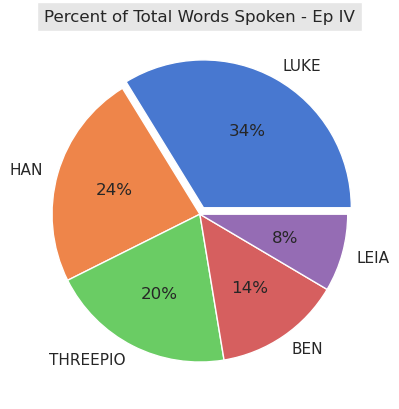

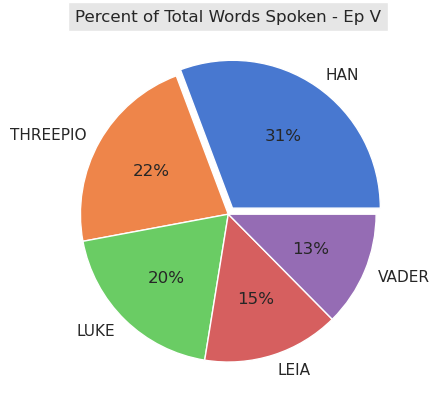

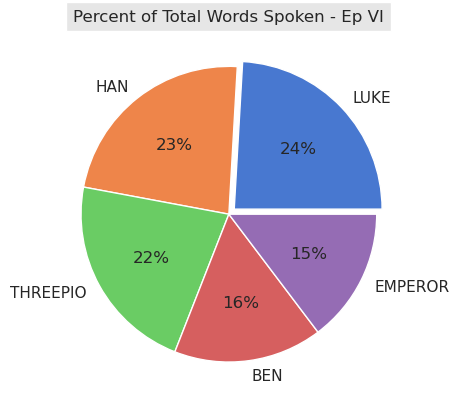

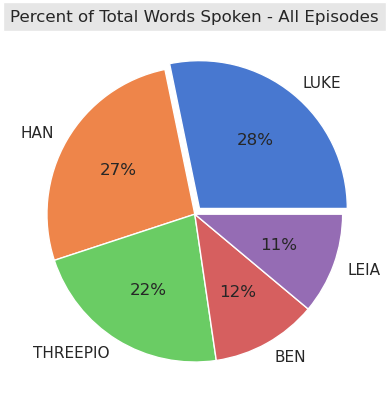

In [7]:
colors = sns.color_palette('muted') # Set color pallete to be used in charts
explode = [0.05, 0, 0, 0, 0] # Set pie charts to 'explode' out the highest value

# Create a pie chart showing what percentage of the total words spoken in epIV each of the top 5 characters has
epIVWordsPieChart = plt.pie(epIVWordCounts.head(), labels=epIVWordCounts.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Words Spoken - Ep IV', bbox={'facecolor':'0.9', 'pad':5}) # Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total words spoken in epV each of the top 5 characters has
epVWordsPieChart = plt.pie(epVWordCounts.head(), labels=epVWordCounts.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Words Spoken - Ep V', bbox={'facecolor':'0.9', 'pad':5}) # Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total words spoken in epVI each of the top 5 characters has
epVIWordsPieChart = plt.pie(epVIWordCounts.head(), labels=epVIWordCounts.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Words Spoken - Ep VI', bbox={'facecolor':'0.9', 'pad':5}) # Create a title for the pie chart
plt.show()

# Create a pie chart showing what percentage of the total words spoken in allEps each of the top 5 characters has
allEpsWordsPieChart = plt.pie(allEpsWordCounts.head(), labels=allEpsWordCounts.head().index, autopct='%.0f%%',
                       colors=colors, explode=explode)
plt.title('Percent of Total Words Spoken - All Episodes', bbox={'facecolor':'0.9', 'pad':5}) # Create a title for the pie chart
plt.show()

# **Visualizing Characters' Average Words Per Line of Dialogue**

In [8]:
# Add column named 'Lines of Dialogue' that calculates the number of lines of dialogue each character has using the transform('count') function
# Add column named 'Total Count of Words' that calculates the number of words each character speaks using the transform('sum') function

epIVCompare = epIVSplit
epIVCompare['Lines of Dialogue'] = epIVCompare.groupby(['Character'])['Dialogue'].transform('count')
epIVCompare['Total Count of Words'] = epIVCompare.groupby(['Character'])['Count of Words'].transform('sum')

epVCompare = epVSplit
epVCompare['Lines of Dialogue'] = epVCompare.groupby(['Character'])['Dialogue'].transform('count')
epVCompare['Total Count of Words'] = epVCompare.groupby(['Character'])['Count of Words'].transform('sum')

epVICompare = epVISplit
epVICompare['Lines of Dialogue'] = epVICompare.groupby(['Character'])['Dialogue'].transform('count')
epVICompare['Total Count of Words'] = epVICompare.groupby(['Character'])['Count of Words'].transform('sum')

allEpsCompare = allEpsSplit
allEpsCompare['Lines of Dialogue'] = allEpsCompare.groupby(['Character'])['Dialogue'].transform('count')
allEpsCompare['Total Count of Words'] = allEpsCompare.groupby(['Character'])['Count of Words'].transform('sum')

allEpsCompare.head()

,Character,Dialogue,Count of Words,Lines of Dialogue,Total Count of Words
0,THREEPIO,Did you hear that? They've shut down the main...,18,301,3539
1,THREEPIO,We're doomed!,2,301,3539
2,THREEPIO,There'll be no escape for the Princess this time.,9,301,3539
3,THREEPIO,What's that?,2,301,3539
4,THREEPIO,I should have known better than to trust the l...,16,301,3539


In [9]:
# Create new column 'Avg Words Per Line of Dialogue' that calculates words spoken per line of dialogue for each Character

epIVCompare['Avg Words Per Line of Dialogue'] = epIVCompare['Total Count of Words'] / epIVCompare['Lines of Dialogue']

epVCompare['Avg Words Per Line of Dialogue'] = epVCompare['Total Count of Words'] / epVCompare['Lines of Dialogue']

epVICompare['Avg Words Per Line of Dialogue'] = epVICompare['Total Count of Words'] / epVICompare['Lines of Dialogue']

allEpsCompare['Avg Words Per Line of Dialogue'] = allEpsCompare['Total Count of Words'] / allEpsCompare['Lines of Dialogue']

allEpsCompare.head()

,Character,Dialogue,Count of Words,Lines of Dialogue,Total Count of Words,Avg Words Per Line of Dialogue
0,THREEPIO,Did you hear that? They've shut down the main...,18,301,3539,11.757475
1,THREEPIO,We're doomed!,2,301,3539,11.757475
2,THREEPIO,There'll be no escape for the Princess this time.,9,301,3539,11.757475
3,THREEPIO,What's that?,2,301,3539,11.757475
4,THREEPIO,I should have known better than to trust the l...,16,301,3539,11.757475


In [10]:
# Remove all columns except for new 'Avg Words Per Line of Dialogue' column, then drop duplicate rows so there is one row per character
# Then sort rows from highest average words per line of dialogue to lowest

epIVCompare = epIVCompare.drop(['Dialogue', 'Count of Words', 'Lines of Dialogue', 'Total Count of Words'], axis=1)
epIVCompare = epIVCompare.drop_duplicates(subset='Character', keep='first').sort_values(by='Avg Words Per Line of Dialogue',ascending=False)

epVCompare = epVCompare.drop(['Dialogue', 'Count of Words', 'Lines of Dialogue', 'Total Count of Words'], axis=1)
epVCompare = epVCompare.drop_duplicates(subset='Character', keep='first').sort_values(by='Avg Words Per Line of Dialogue',ascending=False)

epVICompare = epVICompare.drop(['Dialogue', 'Count of Words', 'Lines of Dialogue', 'Total Count of Words'], axis=1)
epVICompare = epVICompare.drop_duplicates(subset='Character', keep='first').sort_values(by='Avg Words Per Line of Dialogue',ascending=False)

allEpsCompare = allEpsCompare.drop(['Dialogue', 'Count of Words', 'Lines of Dialogue', 'Total Count of Words'], axis=1)
allEpsCompare = allEpsCompare.drop_duplicates(subset='Character', keep='first').sort_values(by='Avg Words Per Line of Dialogue',ascending=False)

allEpsCompare.head()

,Character,Avg Words Per Line of Dialogue
471,OFFICER CASS,36.000000
262,MON MOTHMA,34.333333
802,DODONNA,30.333333
146,REBEL CAPTAIN,26.000000
280,MOTTI,22.500000


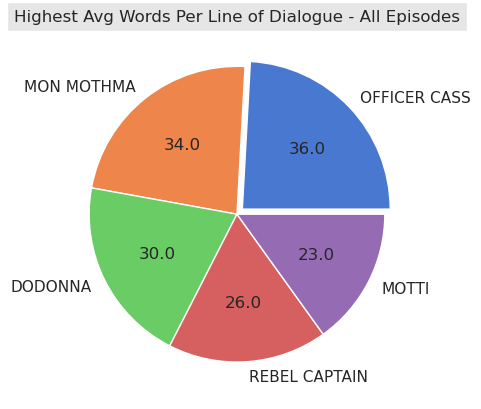

In [11]:
colors = sns.color_palette('muted') # Set color pallete to be used in charts
explode = [0.05, 0, 0, 0, 0] # Set pie charts to 'explode' out the highest value

# Function that converts percentage of Avg Words Per Line of Dialogue back to whole number
def absolute_value(val):
    absVal = np.round(val/100.*allEpsCompare.head()['Avg Words Per Line of Dialogue'].sum(), 0)
    return absVal

# Create a pie chart showing the average words per line of dialogue in epIV each of the top 5 characters has
allEpsComparePieChart = plt.pie(allEpsCompare.head()['Avg Words Per Line of Dialogue'], labels=allEpsCompare.head().Character, autopct=absolute_value,
                       colors=colors, explode=explode)
plt.title('Highest Avg Words Per Line of Dialogue - All Episodes', bbox={'facecolor':'0.9', 'pad':5}) # Create a title for the pie chart
plt.show()

In [12]:
# When I"m done with all the analytics I want to run, go back through and see how many lines of code I can consolidate by creating functions
# that I can apply to each dataframe, which will take less total lines of code and make everything look cleaner